# Experiments
The Experiment class creates Results. It has two constructors:

```python
1. class coba.Experiment(
    environments: cb.Environemnt | Sequence[cb.Environment], 
    learners    : cb.Learner     | Sequence[cb.Learner],
    evaluators  : cb.Evaluator   | Sequence[cb.Evaluator] = cb.SequentialCB(),
    description:str = None)

2. class coba.Experiment(
    eval_tuples: Sequence[Tuple[cb.Environment,cb.Learner,cb.Evaluator]],
    description:str = None)
```

Beyond creating results the Experiment class does four things:

1. **Running** uncompleted experimental work
2. **Saving/Restoring** completed experimental work
3. **Logging** progress to console
4. **Multiprocessing** experimental work, if requested

This notebook covers how to get the most out of Experiment **construction**, **running**, **saving/restoring**, **logging**, and **multiprocessing**

## Construction
The two constructors for **Experiment** are given above. They have the following relationship:

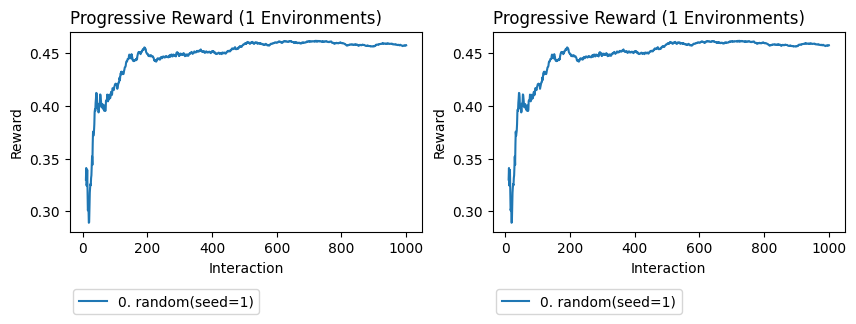

In [7]:
import matplotlib.pyplot as plt
import coba as cb

#given any environments,learners and evalutors
environments = cb.Environments.from_linear_synthetic(1000)
evaluators   = [cb.SequentialCB()]

args1 = [environments,cb.RandomLearner(),evaluators]
args2 = [(e,cb.RandomLearner(),v) for e in environments for v in evaluators]

#these two experiments produce identical results
f,ax = plt.subplots(figsize=(10,4),ncols=2,nrows=1)
cb.Experiment(*args1).run(quiet=True).plot_learners(xlim=(10,None),ax=ax[0],out=None) 
cb.Experiment( args2).run(quiet=True).plot_learners(xlim=(10,None),ax=ax[1],out=None)
plt.show()

## Running
Once an **Experiment** has been created we can produce the experiment Result by calling run

2024-01-28 18:04:14 -- Experiment Started
2024-01-28 18:04:14 -- Recording Learner 0 parameters... (0.0 seconds) (completed)
2024-01-28 18:04:14 -- Recording Evaluator 0 parameters... (0.0 seconds) (completed)
2024-01-28 18:04:14 -- Recording Learner 1 parameters... (0.0 seconds) (completed)
2024-01-28 18:04:14 -- Peeking at Environment 0... (0.0 seconds) (completed)
2024-01-28 18:04:14 -- Recording Environment 0 parameters... (0.0 seconds) (completed)
2024-01-28 18:04:15 -- Evaluating Learner 0 on Environment 0... (0.17 seconds) (completed)
2024-01-28 18:04:15 -- Evaluating Learner 1 on Environment 0... (0.1 seconds) (completed)
2024-01-28 18:04:15 -- Experiment Finished


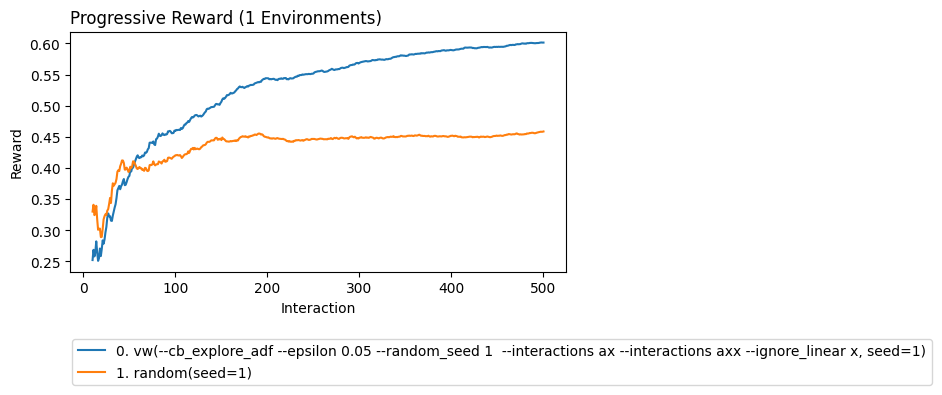

In [10]:
import coba as cb

environments = cb.Environments.from_linear_synthetic(500)
learners     = [cb.VowpalEpsilonLearner(),cb.RandomLearner()]
experiment   = cb.Experiment(environments,learners)

experiment_result = experiment.run()
experiment_result.plot_learners(xlim=(10,None))

## Saving/Restoring

We enable **Experiment** saving and restoring by passing in a file path to `run`. 
+ *Saving* -- When given a file path the experiment incrementally saves as it runs.
+ *Restoring* -- If the given file path exists, the experiment loads the file and begins execution from the last save. 

In [46]:
from pathlib import Path
import coba as cb

if Path("result.log").exists(): Path("result.log").unlink()

environments = cb.Environments.from_linear_synthetic(500,seed=2)
learners     = [cb.VowpalEpsilonLearner(),cb.RandomLearner()]
experiment   = cb.Experiment(environments,learners)

print("---------------------------------------------")
print("   FIRST RUN WILL EXECUTE AND SAVE TO FILE   ")
print("---------------------------------------------")
print(experiment.run("result.log"))
print()
print("---------------------------------------------")
print("   ON THE SECOND RUN WE RESTORE THE FIRST    ")
print("---------------------------------------------")
print(experiment.run("result.log"))

---------------------------------------------
   FIRST RUN WILL EXECUTE AND SAVE TO FILE   
---------------------------------------------
2023-12-22 13:25:20 -- Experiment Started
2023-12-22 13:25:20 -- Recording Learner 0 parameters... (0.0 seconds) (completed)
2023-12-22 13:25:20 -- Recording Evaluator 0 parameters... (0.0 seconds) (completed)
2023-12-22 13:25:20 -- Recording Learner 1 parameters... (0.0 seconds) (completed)
2023-12-22 13:25:20 -- Peeking at Environment 0... (0.0 seconds) (completed)
2023-12-22 13:25:20 -- Recording Environment 0 parameters... (0.0 seconds) (completed)
2023-12-22 13:25:20 -- Peeking at Environment 0... (0.0 seconds) (completed)
2023-12-22 13:25:20 -- Evaluating Learner 0 on Environment 0... (0.22 seconds) (completed)
2023-12-22 13:25:20 -- Peeking at Environment 0... (0.0 seconds) (completed)
2023-12-22 13:25:20 -- Evaluating Learner 1 on Environment 0... (0.08 seconds) (completed)
2023-12-22 13:25:20 -- Experiment Finished
{'Learners': 2, 'Environme

## Progress Updates

**Experiment** progress updates are logged to the console. Logging can be customized in one of two ways.

1. Turn off all logging by passing `quiet=True` to run
2. Fully customize logging by changing the Logger in CobaContext


In [11]:
import coba as cb

print("-------------------------")
print("     DEFAULT LOGGING     ")
print("-------------------------")
print(cb.Experiment(cb.Environments.from_linear_synthetic(500),cb.RandomLearner()).run())

print()
print("-------------------------")
print("     WITH quiet=True     ")
print("-------------------------")
print(cb.Experiment(cb.Environments.from_linear_synthetic(500),cb.RandomLearner()).run(quiet=True))

print()
print("-------------------------")
print("     WITH BasicLogger    ")
print("-------------------------")

# And here change the default global logger
cb.CobaContext.logger = cb.BasicLogger()
print(cb.Experiment(cb.Environments.from_linear_synthetic(500),cb.RandomLearner()).run())

cb.CobaContext.logger = None #this restores to default

-------------------------
     DEFAULT LOGGING     
-------------------------
2023-12-22 13:52:23 -- Experiment Started
2023-12-22 13:52:23 -- Recording Learner 0 parameters...
2023-12-22 13:52:23 -- Recording Learner 0 parameters... (0.0 seconds) (completed)
2023-12-22 13:52:23 -- Recording Evaluator 0 parameters...
2023-12-22 13:52:23 -- Recording Evaluator 0 parameters... (0.0 seconds) (completed)
2023-12-22 13:52:23 -- Peeking at Environment 0...
2023-12-22 13:52:23 -- Peeking at Environment 0... (0.0 seconds) (completed)
2023-12-22 13:52:23 -- Recording Environment 0 parameters...
2023-12-22 13:52:23 -- Recording Environment 0 parameters... (0.0 seconds) (completed)
2023-12-22 13:52:23 -- Peeking at Environment 0...
2023-12-22 13:52:23 -- Peeking at Environment 0... (0.0 seconds) (completed)
2023-12-22 13:52:23 -- Evaluating Learner 0 on Environment 0...
2023-12-22 13:52:23 -- Evaluating Learner 0 on Environment 0... (0.09 seconds) (completed)
2023-12-22 13:52:23 -- Experiment Fin

## Multiprocessing

**Experiment** provides multiprocessing support to speed up experiments. 

Multiprocessing happens at the level of environment-learner-evaluator, so learners do not need to be multiprocessed to benefit.

Below is an example

In [34]:
import time
import coba as cb

environments = cb.Environments.from_linear_synthetic(2000,seed=[1,2,3,4])
learners     = [cb.RandomLearner()]
evaluators   = [cb.SequentialCB()]

args = [(e,l,v) for e in environments for l in learners for v in evaluators]

# We have four triples in this experiment... (i.e., len(args) == 4)
# This means multiprocessing beyond four processes will not give us any additional speedup
# Using more processes than your available cores will slow down the experiment time

start = time.time()
out = cb.Experiment(args).run(quiet=True,processes=1)
print(f"1 PROCESS TIME: {time.time()-start:.3f} {out}")

start = time.time()
out = cb.Experiment(args).run(quiet=True,processes=2)
print(f"2 PROCESS TIME: {time.time()-start:.3f} {out}")

start = time.time()
out = cb.Experiment(args).run(quiet=True,processes=4)
print(f"4 PROCESS TIME: {time.time()-start:.3f} {out}")


1 PROCESS TIME: 1.382 {'Learners': 1, 'Environments': 4, 'Interactions': 8000}
2 PROCESS TIME: 0.956 {'Learners': 1, 'Environments': 4, 'Interactions': 8000}
4 PROCESS TIME: 0.704 {'Learners': 1, 'Environments': 4, 'Interactions': 8000}


### Multiprocessing Chunks
To get more from multiprocessing we can chunk environments. This can beneficial when a given environment takes considerable resources to generate. 

Below we create 8 environments but chunk them after creating the first 4. This means there will be four multiprocessing tasks with 2 environments each.

In [35]:
environments = cb.Environments.from_linear_synthetic(2000,seed=[1,2,3,4]).chunk().shuffle([1,2])
learners     = [cb.RandomLearner()]
evaluators   = [cb.SequentialCB()]

args = [(e,l,v) for e in environments for l in learners for v in evaluators]

start = time.time()
out = cb.Experiment(args).run(quiet=True,processes=1)
print(f"1 PROCESS TIME: {time.time()-start:.3f} {out}")

start = time.time()
out = cb.Experiment(args).run(quiet=True,processes=2)
print(f"2 PROCESS TIME: {time.time()-start:.3f} {out}")

start = time.time()
out = cb.Experiment(args).run(quiet=True,processes=4)
print(f"4 PROCESS TIME: {time.time()-start:.3f} {out}")


1 PROCESS TIME: 1.491 {'Learners': 1, 'Environments': 8, 'Interactions': 16000}
2 PROCESS TIME: 0.947 {'Learners': 1, 'Environments': 8, 'Interactions': 16000}
4 PROCESS TIME: 0.722 {'Learners': 1, 'Environments': 8, 'Interactions': 16000}
